# Customer Segmentation Diagnostic Visualizations

This notebook performs diagnostic checks on wholesale customer data to evaluate its suitability for DBSCAN clustering. It focuses on outlier detection and multicollinearity assessment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and Prepare the Dataset
def load_and_prepare(file_path):
    df = pd.read_csv(file_path)
    # Select only numerical columns (already numerical in this dataset based on preview)
    df_numeric = df.select_dtypes(include=[np.number])
    # Round numerical values to two decimals
    df_numeric = df_numeric.round(2)
    return df_numeric

file_path = 'ML470_S8_Wholesale Customers data_Practice.csv'
df = load_and_prepare(file_path)
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


## 2. Outlier Assessment and Visualization

Generating boxplots to identify extreme values and skewness.

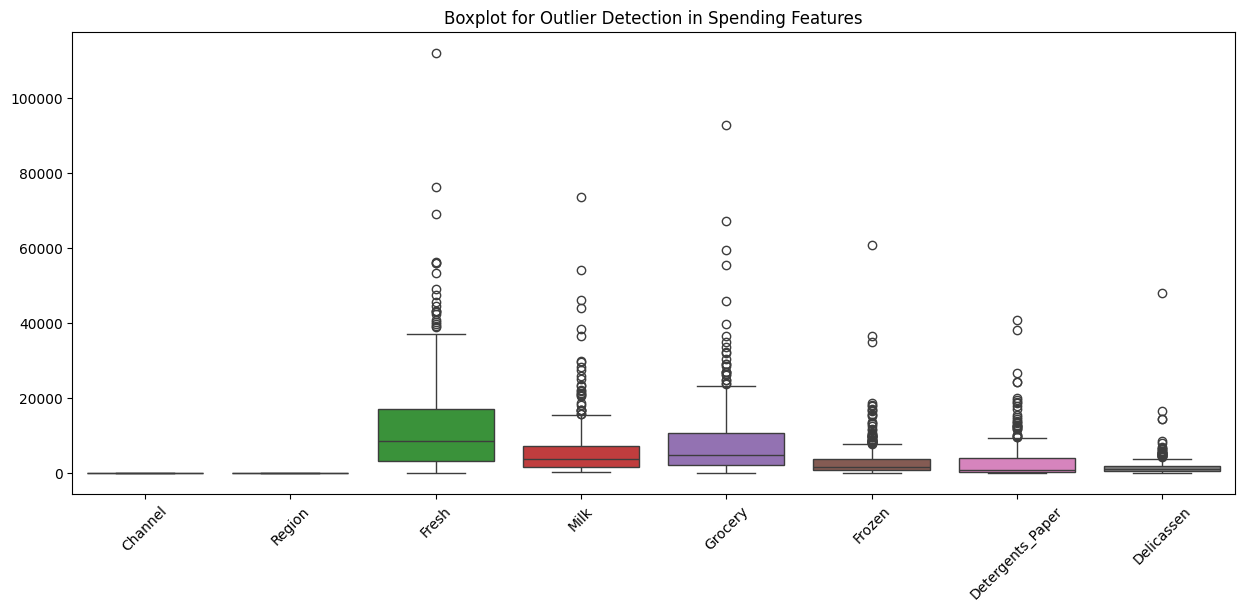

In [2]:
def visualize_outliers(df):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df)
    plt.title('Boxplot for Outlier Detection in Spending Features')
    plt.xticks(rotation=45)
    plt.show()

visualize_outliers(df)

## 3. Apply Outlier Treatment

Using IQR-based capping to limit the influence of extreme values.

In [3]:
def treat_outliers_iqr(df):
    df_treated = df.copy()
    for col in df_treated.columns:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Capping the values
        df_treated[col] = np.where(df_treated[col] < lower_bound, lower_bound, 
                                   np.where(df_treated[col] > upper_bound, upper_bound, df_treated[col]))
    return df_treated

df_treated = treat_outliers_iqr(df)
print("Outlier treatment completed.")

Outlier treatment completed.


## 4. Visualize Multicollinearity

Generating a correlation heatmap using the outlier-treated dataset.

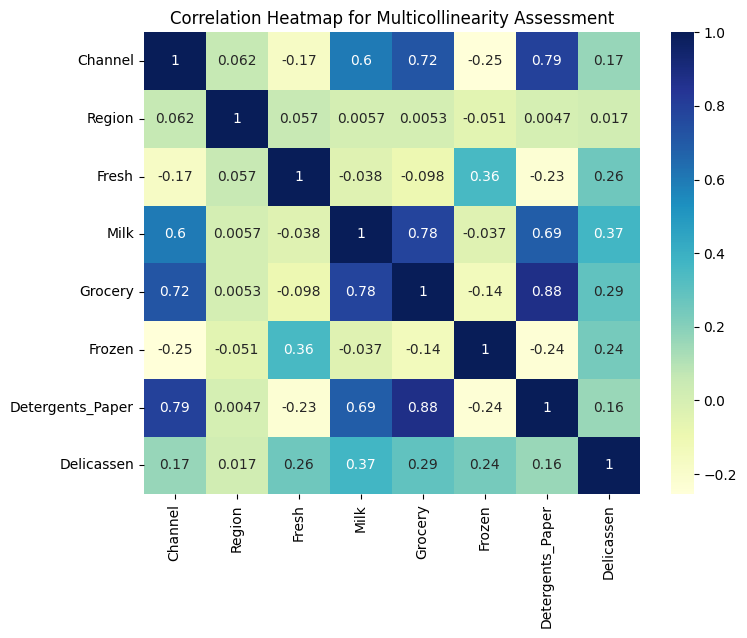

In [5]:
def visualize_multicollinearity(df):
    plt.figure(figsize=(8, 6))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2g')
    plt.title('Correlation Heatmap for Multicollinearity Assessment')
    plt.show()

visualize_multicollinearity(df_treated)